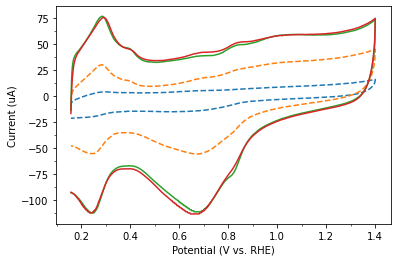

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import tkinter as ttk
from tkinter import filedialog
import numpy as py
from scipy.interpolate import interp1d
import sys
from matplotlib.ticker import AutoMinorLocator
import math

    

#Opens a GUI for the user to select a folder to import XRD diffractograms from
root = ttk.Tk()
frm = ttk.Frame(root)
frm.grid()
ttk.Label(frm, text="Select folder that contains Raman data.").grid(column=0, row=0)
folder_path = ttk.filedialog.askdirectory(title="Select Folder")
ttk.Button(frm, text="next", command=root.destroy).grid(column=2, row=0)
root.mainloop()

# Check if a folder was selected
if folder_path:
    # Get a list of all CSV files in the selected directory
    csv_files = glob.glob(folder_path + '/*.csv')

    # Initialize the plot
    
    fig, ax = plt.subplots()
    
    #intialize the counter
    counter = 0
    # Plot each XRD diffractogram
    for file in csv_files:
        # Read the CSV file
        data = pd.read_csv(file)

        # Extract the required columns (assuming they are labeled as '2Theta' and 'Intensity')
        x = data['Voltage']
        y = data['Current']
        
 
        
        

        # Plot the diffractogram
        if counter == 0:
            ax.plot(x+(0.0592*12.899)+0.10434, (y*1000000), label=file[72:-4], linestyle ='dashed')
        elif counter == 1:
            ax.plot(x+(0.0592*12.899)+0.10434, (y*1000000), label=file[72:-4], linestyle ='dashed')
        else:
            ax.plot(x+(0.0592*12.899)+0.10434, (y*1000000), label=file[72:-4],)
        
        counter = counter + 1
            
        #ax.plot(py.log10(abs((y*1000)/0.196)),x+(0.0592*12.899)+0.10434, label=file[72:-4])  # Tafel, does not work just do in gamry program lol

    # Set plot properties
    fig.set_facecolor('white')
    afont = {'fontname':'Arial', 'size':12}
    plt.xlabel('Potential (V vs. RHE)')
    plt.ylabel('Current (uA)') #cm$^{2}$
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))
    #ax.spines['right'].set_visible(False) these set the upper and leftmost borders to invis - formatting choice
    #ax.spines['top'].set_visible(False)
    
     #get handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    #specify order of items in legend
    order = [0,1]

    #add legend to plot
    #plt.legend()
    #plt.ylim(1,0.85) limits
    
    
    plt.grid(False)
    

    # Save the graph as an image
    plt.savefig('output.png', dpi=1200)

    # Display the graph
    plt.show()
else:
    exit()

# 